# Chapter 6: The Fundamental Law of Active Management

## Summary
- A strategy's breadth is the number of independent, active decisions available per year
- The manager's skill, measured by the information coefficient, is the correlation between forecasts and results
- The fundamental law of active management explains the information ratio in terms of breadth and skill
- The additivity of the fundamental law allows for an attribution of value added to different components of a strategy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Fundamental Law
- _The fundamental law of active management_ gives an approximation to the information ratio.
- Based on two attributes of a strategy _breadth_ and _skill_
***
 - BR is the strategy's _breath_  (the number of independent forecasts of exception returns we make per year)
 - IC is the manager's _information coefficient._. (measure of skill is correlation of each forecast with the actual outcomes.

$$ \boxed{ IR = IC \cdot \sqrt{BR} } $$

As above to increase information ratio from 0.5 to 1 we either need to double our skill, increase breath (BR) by a factor of 4 or combination of both.

Expressing the optimal level of residual risk &nbsp; $\omega^{*}$

$$ \boxed{ \omega^{*} = \frac{IR}{2\lambda_{R}} = \frac{IC \cdot \sqrt{BR}}{2\lambda_{R}} }$$

And Value Add

$$ \boxed{ VA^{*} = \frac{IR^{2}}{4\lambda_{R}} = \frac{IC^{2} \cdot BR}{4\lambda_{R}} }$$





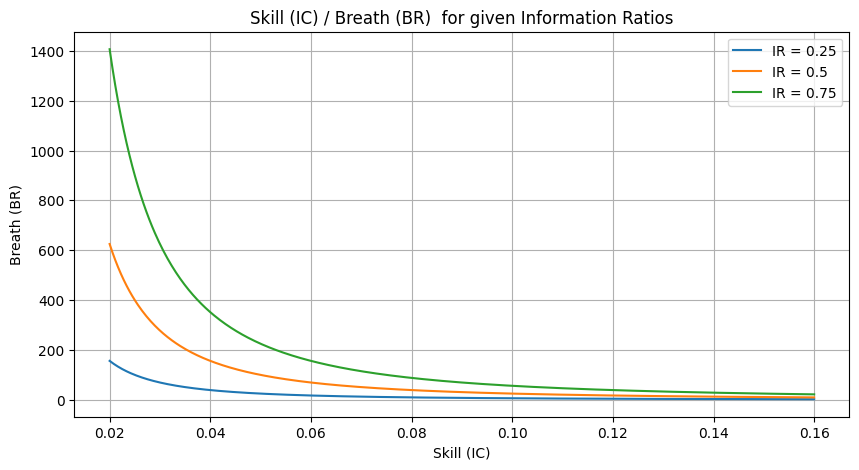

In [2]:
def br_for_ic_ir(ic, ir):
     return (ir / ic)**2

ic_levels = np.linspace(0.02, 0.16, 500)
ir_levels = [0.25, 0.5, 0.75]

plt.subplots(figsize=(10, 5))
for ir in ir_levels:
    plt.plot(ic_levels, br_for_ic_ir(ic_levels,  ir), label=f'IR = {ir}')

plt.grid(True)
plt.title("Skill (IC) / Breath (BR)  for given Information Ratios")
plt.xlabel("Skill (IC)")
plt.ylabel("Breath (BR)")
plt.legend(loc='upper right')
plt.show()

## Example

Consider roulette choosing either red or black.   18 black / 18 red / 1 green

- The expected return per bet is $(\frac{19}{37}) \cdot (100\%) + (\frac{18}{37}) \cdot (-100\%) = 2.7027\%$
- Standard deviation of the return on that single bet is $99.9634\%$
- If there is only a single bet then the information ratio is $\frac{2.7027}{99.9634} = 0.027038$. The formula predicts $0.027027$ (very close)

**Now for 1 million bets to show the effect of breadth**
- Expected return remains $2.7027$
- The standard deviation drops to $0.09996\%$
- This gives an IR of $27.038$ against formula prediction of $\frac{1}{37} \cdot \sqrt{1,000,000} = 27.027$


## Additivity
- The fundamental law is additive in the *squared* information ratios.
- Example for two classes of stocks the information ratio for the aggregate will be:

$$\boxed{ IR^{2} = BR_{1} \cdot IC\_{1}^{2} + BR_{2} \cdot IC_{2}^{2} }$$

- Also on correlations if $\gamma$ is the correlation between two information sources then the skill level of the combined sources $IC(com)$ is:

$$\boxed{ IC(com) = IC \cdot \sqrt{ \frac{2}{1 + \gamma} } }$$


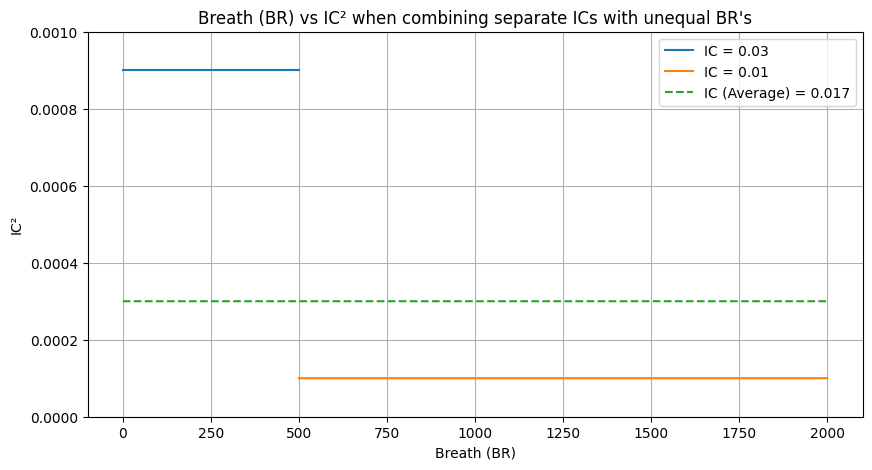

In [3]:
# Additivity example (no correlations)
ic_1, ic_2 = 0.03, 0.01
br_1, br_2 = 500, 1500
ic_avg = np.sqrt((br_1 * ic_1 ** 2 + br_2 * ic_2 ** 2) / (br_1 + br_2)) # combine with weightings

br_1_points = np.linspace(0, br_1, br_1)
br_2_points = np.linspace(br_1, br_1+br_2, br_2)
br_avg_points = np.linspace(0, br_1 + br_2, br_1 + br_2)

plt.subplots(figsize=(10, 5))
plt.plot(br_1_points, np.ones(len(br_1_points))*ic_1**2, label=f'IC = {ic_1}')
plt.plot(br_2_points, np.ones(len(br_2_points))*ic_2**2, label=f'IC = {ic_2}')
plt.plot(br_avg_points, np.ones(len(br_avg_points))*ic_avg**2, linestyle='--', label=f'IC (Average) = {ic_avg:.3f}')

plt.grid(True)
plt.title("Breath (BR) vs IC² when combining separate ICs with unequal BR's")
plt.xlabel("Breath (BR)")
plt.ylabel("IC²")
plt.legend(loc='upper right')
plt.ylim([0.0, 0.0010])
plt.show()